## **ACERCA DEL DATASET**

In [28]:
#Importando las librerias para el EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv(r"E:\FONDO TALENTO DIGITAL\Portafolio_GITHUB\Diabetes\diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [30]:
df.shape
print(f"El Dataset contiene: {df.shape[0]} filas")
print(f"El Dataset contiene: {df.shape[1]} columnas")

El Dataset contiene: 768 filas
El Dataset contiene: 9 columnas


In [31]:
df.duplicated().sum()

0

*De acuerdo a la celda anterior observamos que nuestro dataset no contiene filas duplicadas, por lo cual inferimos que tenemos filas unicas.*

In [32]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*Observamos que nuestro Dataset no posee valores nulos en cada columna*

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


La informacion que nos brinda el Dataset sobre diabetes es la siguiente:

◘ *El Dataset contiene 768 filas no nulas y 9 columnas o caracteristicas*

◘ *Observamos dentro del dataset unicamente columnas numericas, 
en este caso tenemos 7 caracteristicas numericas del tipo entero(int64) y 2 caracteristicas del tipo flotante (float64)*

◘ *La columna Outcome es la variable objetivo (Target)*

## **ANALISIS EXPLORATORIO DE LOS DATOS**

In [34]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

*Para poder entender mejor el desarrollo de nuestro EDA realizaremos un renombre de las columnas al español*

In [35]:
df.rename(columns={'Pregnancies':'Embarazos',
                   'Glucose':'Glucosa',
                   'BloodPressure':'PresionSanguinea',
                   'SkinThickness':'GrosorDePiel',
                   'Insulin':'Insulina',
                   'BMI':'IndiceMasaCorporal',
                   'DiabetesPedigreeFunction':'FuncionPedigriDiabetes',
                   'Age':'Edad',
                   'Outcome':'Resultado'}, inplace=True)

In [36]:
df.columns

Index(['Embarazos', 'Glucosa', 'PresionSanguinea', 'GrosorDePiel', 'Insulina',
       'IndiceMasaCorporal', 'FuncionPedigriDiabetes', 'Edad', 'Resultado'],
      dtype='object')

#### **ANALISIS DE LA VARIABLE OBJETIVO (TARGET)-RESULTADO**

In [38]:
df['Resultado'].value_counts()

Resultado
0    500
1    268
Name: count, dtype: int64

In [39]:
df['Resultado'].value_counts()*100/len(df)

Resultado
0    65.104167
1    34.895833
Name: count, dtype: float64

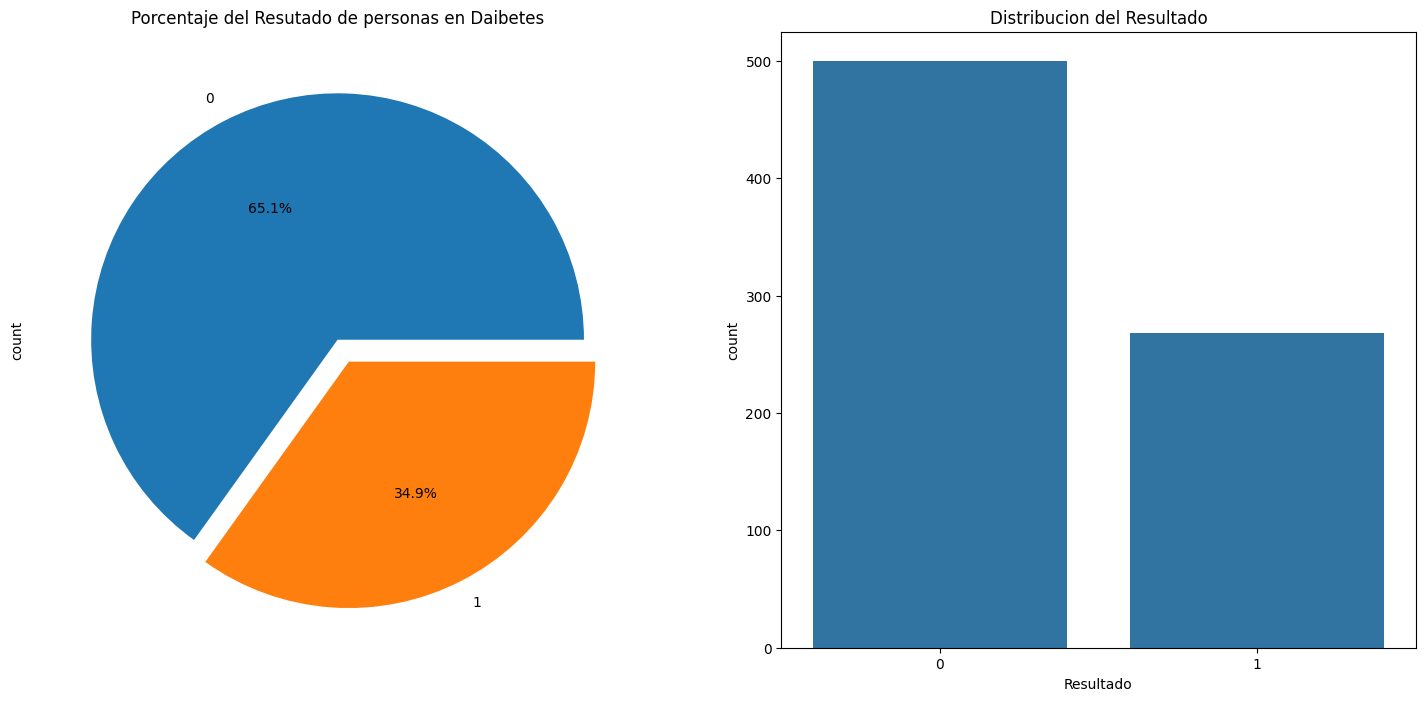

In [40]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Resultado'].value_counts().plot.pie(explode=[0,0.1], autopct="%1.1f%%",ax=ax[0],shadow=False)
ax[0].set_title("Porcentaje del Resutado de personas en Daibetes")
sns.countplot(x='Resultado',data=df,ax=ax[1])
ax[1].set_title("Distribucion del Resultado")
plt.show()


*Por medio de estos graficos observamos que la poblacion que no posee diabetes es superior a la poblacion que si lo posee asi mismo la poblacion libre de diabetes posee mayor catidad de personas en este caso de 500 personas libres de diabetes y las que no poseen diabetes solo llegan a 268*

In [37]:
df.describe()

,Embarazos,Glucosa,PresionSanguinea,GrosorDePiel,Insulina,IndiceMasaCorporal,FuncionPedigriDiabetes,Edad,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*Observando la informacion estadistica 